# Explore here

In [49]:
#Librerias 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np


In [7]:
#Cargar csv
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
pd.set_option('display.max_columns', None)
df.head()
num_rows, num_columns = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_columns}")



Número de filas: 3140
Número de columnas: 108


In [23]:
#EDA
#Limpiar datos

nans= df.isna()
dupli= df.duplicated()
df.nunique()
nanss= df.isna().sum()
dupli.sum()

df.dropna()
df.drop_duplicates()

df["COUNTY_NAME"].nunique()
df["STATE_NAME"].nunique()
df["Heart disease_number"].nunique()

df_tipo = df.select_dtypes(include= ["int64", "float"])
df_tipo.head()

#Normalizar los datos numéricos

scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_tipo), index=df_tipo.index, columns=df_tipo.columns)
df_norm.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,-0.122010,1.515069,-0.138129,0.263445,-0.176461,-1.067889,-0.156294,-0.503639,-0.167598,-0.724248,-0.155953,-0.475265,-0.051455,0.710731,-0.196442,-0.241496,-0.124761,-0.115433,-0.087858,-0.030480,-0.165397,-0.191608,-0.145679,-0.154872,-0.316235,0.250655,-0.284799,0.344613,-0.513170,0.060785,-0.045366,-0.117586,-0.132905,-0.158201,-0.145939,-0.333019,-0.234382,-0.447577,0.649528,-0.125899,-0.221739,-0.202843,-0.043632,0.472531,0.370220,0.566185,-0.151210,-0.151024,-0.152525,-0.353571,0.472531,1.468943,-0.894491,-0.934081,-0.856179,-0.846273,-0.017028,0.110809,-0.154944,-0.256149,-0.117965,-0.171894,-0.173594,-0.175321,-0.210637,-0.143727,-0.175907,-1.013112,-1.936434,-0.952441,-0.148472,0.126376,0.116487,0.087963,-0.133552,0.172860,0.177849,0.154082,-0.135426,-0.402548,-0.380391,-0.392897,-0.144279,-0.211219,-0.256304,-0.206071,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,0.332513,0.715673,0.382732,0.153177,0.521999,0.215895,0.676174,0.543366,0.442092,-0.284722,0.466348,0.170748,0.093946,-0.027772,0.067848,-0.203651,-0.083125,-0.141497,-0.049532,-0.076506,0.094029,-0.219210,0.341296,1.518514,-0.057592,-0.264720,-0.024296,-0.173131,-0.282330,2.122197,2.0804

In [39]:
#Train y test
X = df_norm.drop(columns=["Heart disease_number"])
y = df_norm["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = int(len(X_train.columns) * 0.3)
selec_model = SelectKBest(score_func = f_regression, k = k)
selec_model.fit(X_train, y_train)
modelo = selec_model.get_support()

X_train_sel = pd.DataFrame(selec_model.transform(X_train), columns = X_train.columns.values[modelo])
X_test_sel = pd.DataFrame(selec_model.transform(X_test), columns = X_test.columns.values[modelo])

X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

#Falyta , index = False
X_train_sel.to_csv("../data/processed/clean_train.csv")
X_test_sel.to_csv("../data/processed/clean_test.csv") 

total_datos = pd.concat([X_train_sel, X_test_sel])
total_datos.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,-0.229069,-0.232556,-0.245517,-0.237489,-0.232259,-0.203022,-0.231210,-0.233275,-0.178637,-0.265998,-0.209960,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,-0.225814
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,-0.126439,-0.158676,-0.007424,-0.182866,-0.190434,-0.126996,-0.172162,-0.173861,-0.129283,-0.160316,-0.063930,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,-0.115392
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,-0.187194,-0.199114,-0.157678,-0.212248,-0.225012,-0.205040,-0.204984,-0.205183,-0.196284,-0.215815,-0.271374,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,-0.216207
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,-0.044020,-0.036595,0.021856,0.017843,-0.089371,-0.098094,-0.039603,-0.038050,-0.074907,-0.171032,0.021187,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,-0.007276
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,0.126315,0.090839,0.280058,0.170026,-0.032765,0.203359,0.067488,0.066377,0.091951,0.044000,0.262528,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,0.197812


In [42]:
#Regresión linear

train_datos = pd.read_csv("../data/processed/clean_train.csv")
test_datos = pd.read_csv("../data/processed/clean_test.csv")

X_train = train_datos.drop(columns=["Heart disease_number"])
y_train = train_datos["Heart disease_number"]

X_test = test_datos.drop(columns=["Heart disease_number"])
y_test = test_datos["Heart disease_number"]

# Entrenar el modelo de regresión lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predecir con el modelo de regresión lineal
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Calcular R^2 para el modelo de regresión lineal
train_r2_linear = r2_score(y_train, y_train_pred)
test_r2_linear = r2_score(y_test, y_test_pred)

print(f"R2 train {train_r2_linear}")
print(f"R2 test {test_r2_linear}")

R2 train 0.9993421876310618
R2 test 0.9977919274853896


Como la R2 es muy cercana a 1 hay una marcada relación linear directa 

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+00, tolerance: 2.911e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

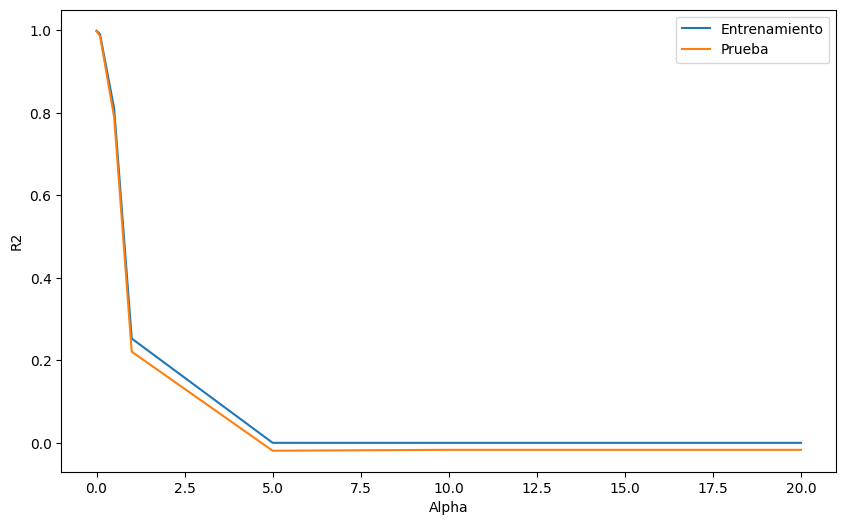

In [55]:
#Laso
#Prueba con las alphas de 0 a 20 
alphas = [0.0, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]

train_r2_laso = []
test_r2_laso = []

for alpha in alphas:
    laso_modelo = Lasso(alpha=alpha)
    laso_modelo.fit(X_train, y_train)
    
    # Predecir
    y_train_pred_laso = laso_modelo.predict(X_train)
    y_test_pred_laso = laso_modelo.predict(X_test)
    
    # Calcular R^2
    train_r2_laso.append(r2_score(y_train, y_train_pred_laso))
    test_r2_laso.append(r2_score(y_test, y_test_pred_laso))

# Graficar la evolución de R^2 con diferentes valores de alpha
plt.figure(figsize=(10,6))
plt.plot(alphas, train_r2_laso, label="Entrenamiento")
plt.plot(alphas, test_r2_laso, label="Prueba")
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.legend()
plt.show()

Alpha 0 es el valor con más exactitud pero puede tener overfitting. Los valores pueden estar entre 0 y 2.5, voy a hacer un segundo grafico centrado en esos valores

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+00, tolerance: 2.911e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skle

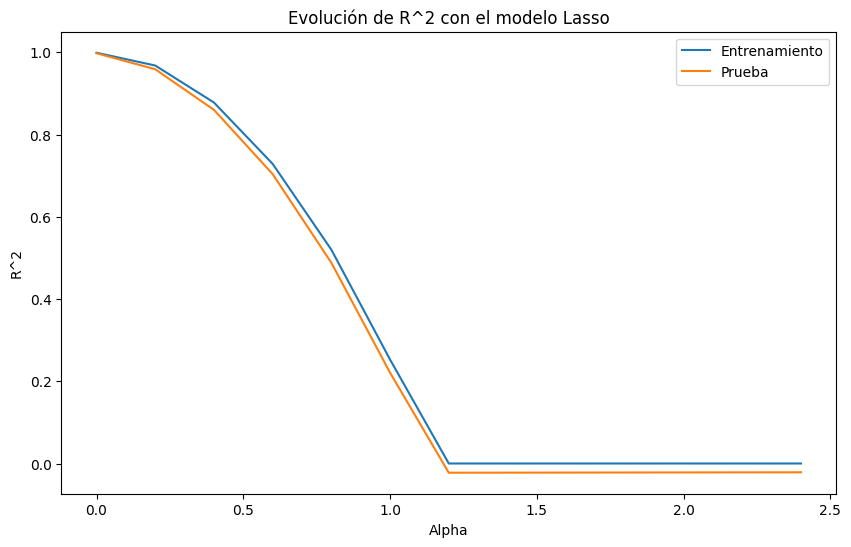

In [54]:
alphas = [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]

train_r2_laso = []
test_r2_laso = []

for alpha in alphas:
    laso_modelo = Lasso(alpha=alpha)
    laso_modelo.fit(X_train, y_train)
    
    # Predecir
    y_train_pred_laso = laso_modelo.predict(X_train)
    y_test_pred_laso = laso_modelo.predict(X_test)
    
    # Calcular R^2
    train_r2_laso.append(r2_score(y_train, y_train_pred_laso))
    test_r2_laso.append(r2_score(y_test, y_test_pred_laso))

# Graficar la evolución de R^2 con diferentes valores de alpha
plt.figure(figsize=(10,6))
plt.plot(alphas, train_r2_laso, label="Entrenamiento")
plt.plot(alphas, test_r2_laso, label="Prueba")
plt.xlabel("Alpha")
plt.ylabel("R2")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir un rango más amplio de valores para alpha
alpha_values = {'alpha': [0.1, 0.5, 1, 5, 10, 20]}

# GridSearchCV para Lasso
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid=alpha_values, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Mejor hiperparámetro encontrado
best_alpha = grid_search.best_params_['alpha']
print(f"Mejor valor de alpha: {best_alpha}")

# Entrenar el modelo Lasso con el mejor valor de alpha
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

# Evaluar el modelo con el mejor alpha
y_train_best_lasso = best_lasso_model.predict(X_train)
y_test_best_lasso = best_lasso_model.predict(X_test)

train_r2_best_lasso = r2_score(y_train, y_train_best_lasso)
test_r2_best_lasso = r2_score(y_test, y_test_best_lasso)

print(f"Mejor R^2 en entrenamiento (Lasso optimizado): {train_r2_best_lasso}")
print(f"Mejor R^2 en prueba (Lasso optimizado): {test_r2_best_lasso}")
